In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from matplotlib.pylab import rcParams  #ajustando o matplot para um tamanho maior
rcParams['figure.figsize'] = 15, 6

In [9]:
rt = pd.read_excel('rotatividadegeral.xlsx',
                  sheet_name = 'rotatividade', 
                   usecols = ['Altamira', 'Tucurui', 'tempo'], 
                   index_col='tempo',parse_dates = True)

In [10]:
rt

,Altamira,Tucurui
tempo,,
2004-02-01,7.350746,11.904762
2004-03-01,3.283582,22.619048
2004-04-01,3.768657,5.952381
2004-05-01,6.417910,30.952381
2004-06-01,7.985075,10.714286
...,...,...
2019-08-01,8.661417,2.072357
2019-09-01,16.666667,1.932537
2019-10-01,9.600000,1.265378


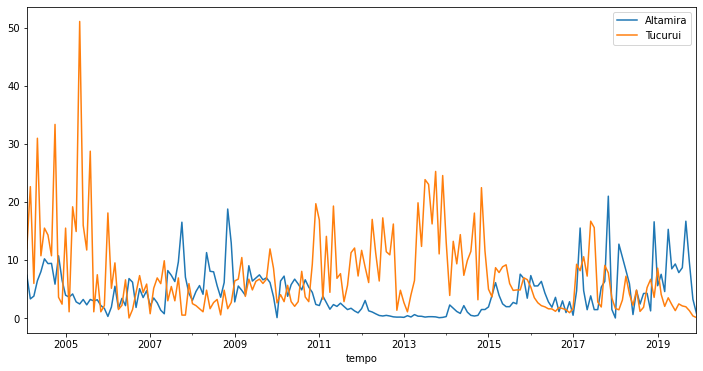

In [11]:
rt.plot(figsize=(12,6))


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


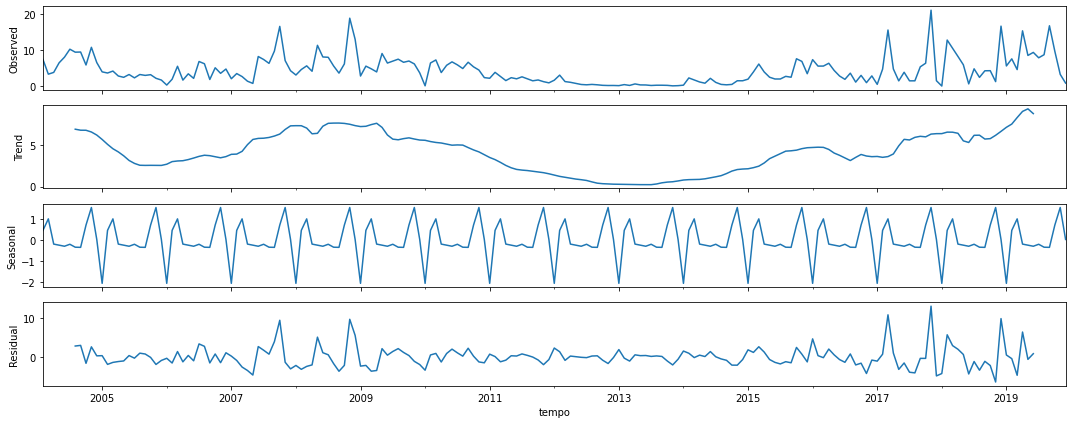

In [13]:
results = seasonal_decompose(rt['Altamira'])
results.plot();

In [14]:
len(rt)

191

In [17]:
alt = rt[['Altamira']]
tucu = rt[['Tucurui']]

In [18]:
train_alt = alt.iloc[:171]
train_tucu = tucu.iloc[:171]
test_alt = alt.iloc[171:]
test_tucu = tucu.iloc[171:]

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
scaler.fit(train_alt)
scaler.fit(train_tucu)
scaled_treino_ae = scaler.transform(train_alt)
scaled_teste_ae = scaler.transform(test_alt)
scaled_treino_tuc = scaler.transform(train_tucu)
scaled_teste_tuc = scaler.transform(test_tucu)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Altamira
Feature names seen at fit time, yet now missing:
- Tucurui

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Altamira
Feature names seen at fit time, yet now missing:
- Tucurui

  warnings.warn(message, FutureWarning)


In [22]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
n_input = 3
n_features = 1
generator_alt = TimeseriesGenerator(scaled_treino_ae, scaled_treino_ae, length=n_input, batch_size=1)
generator_tucu = TimeseriesGenerator(scaled_treino_tuc, scaled_treino_tuc, length=n_input, batch_size=1)

In [25]:
#Altamira 

X,y = generator_alt[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.14395211 0.06430348 0.07380286]
Predict this y: 
 [[0.12568408]]


In [28]:
#Tucuruí

Z,w = generator_tucu[0]
print(f'Given the Array: \n{Z.flatten()}')
print(f'Predict this y: \n {w}')

Given the Array: 
[0.23313492 0.44295635 0.11656746]
Predict this y: 
 [[0.60615079]]


In [29]:
X.shape

(1, 3, 1)

In [30]:
#Ampliando para 12 meses

n_input = 12
generator_alt = TimeseriesGenerator(scaled_treino_ae, scaled_treino_ae, length=n_input, batch_size=1)
generator_tucu = TimeseriesGenerator(scaled_treino_tuc, scaled_treino_tuc, length=n_input, batch_size=1)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [34]:
#modelo definido

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [39]:
#fit model Altamira

model.fit(generator_alt,epochs=50)

Epoch 1/50
159/159 [==============================] - 3s 7ms/step - loss: 0.0043
Epoch 2/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0040
Epoch 3/50
159/159 [==============================] - 2s 10ms/step - loss: 0.0038
Epoch 4/50
159/159 [==============================] - 2s 11ms/step - loss: 0.0037
Epoch 5/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0039
Epoch 6/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0038
Epoch 7/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0038
Epoch 8/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0037
Epoch 9/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0036
Epoch 10/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0037
Epoch 11/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0037
Epoch 12/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0035
Epoch 13/50
159/159 [==

In [40]:
#fit model Altamira

model.fit(generator_tucu,epochs=50)

Epoch 1/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0165
Epoch 2/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0158
Epoch 3/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0150
Epoch 4/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0149
Epoch 5/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0143
Epoch 6/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0146
Epoch 7/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0143
Epoch 8/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0140
Epoch 9/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0144
Epoch 10/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0141
Epoch 11/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0140
Epoch 12/50
159/159 [==============================] - 1s 7ms/step - loss: 0.0138
Epoch 13/50
159/159 [====

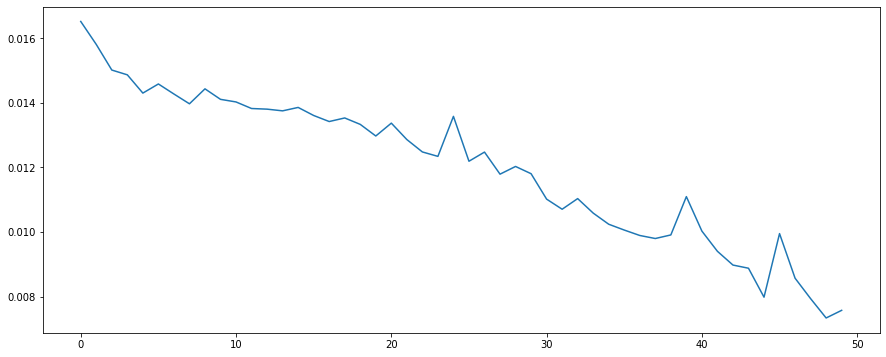

In [41]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [42]:
last_train_batch_alt = scaled_treino_ae[-12:]
last_train_batch_tucu = scaled_treino_tuc[-12:]

In [43]:
last_train_batch_alt = last_train_batch_alt.reshape((1, n_input, n_features))
last_train_batch_tucu = last_train_batch_tucu.reshape((1, n_input, n_features))

In [44]:
model.predict(last_train_batch_alt)

array([[0.18492809]], dtype=float32)

In [45]:
model.predict(last_train_batch_tucu)

array([[0.11046731]], dtype=float32)

In [46]:
scaled_teste_ae[0]

array([0.11519608])

In [47]:
scaled_teste_tuc[0]

array([0.08010108])

In [54]:
#test_pred Altamira

test_predictions_alt = []

first_eval_batch = scaled_treino_ae[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_alt)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions_alt.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [53]:
#test_pred Tucuruí

test_predictions_tucu = []

first_eval_batch = scaled_treino_tuc[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_tucu)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions_tucu.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [57]:
test_predictions_tucu

[array([0.11046731], dtype=float32),
 array([0.13054237], dtype=float32),
 array([0.13948625], dtype=float32),
 array([0.12145609], dtype=float32),
 array([0.1134604], dtype=float32),
 array([0.11611596], dtype=float32),
 array([0.10913289], dtype=float32),
 array([0.09906089], dtype=float32),
 array([0.09083122], dtype=float32),
 array([0.08303303], dtype=float32),
 array([0.07721446], dtype=float32),
 array([0.07622914], dtype=float32),
 array([0.07240537], dtype=float32),
 array([0.0714194], dtype=float32),
 array([0.07229569], dtype=float32),
 array([0.07247924], dtype=float32),
 array([0.07335487], dtype=float32),
 array([0.07507749], dtype=float32),
 array([0.07675319], dtype=float32),
 array([0.07832761], dtype=float32)]

In [58]:
test_tucu.head()

,Tucurui
tempo,
2018-05-01,4.090268
2018-06-01,2.187721
2018-07-01,4.802260
2018-08-01,1.130742
2018-09-01,1.838755


In [59]:
true_predictions_tucu = scaler.inverse_transform(test_predictions_tucu)

In [60]:
test_tucu['Predictions'] = true_predictions_tucu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
test_tucu

,Tucurui,Predictions
tempo,,
2018-05-01,4.090268,5.640884
2018-06-01,2.187721,6.665993
2018-07-01,4.802260,7.122702
2018-08-01,1.130742,6.202013
2018-09-01,1.838755,5.793723
2018-10-01,5.237084,5.929326
2018-11-01,6.657224,5.572743
2018-12-01,3.543586,5.058429
2019-01-01,8.581560,4.638190


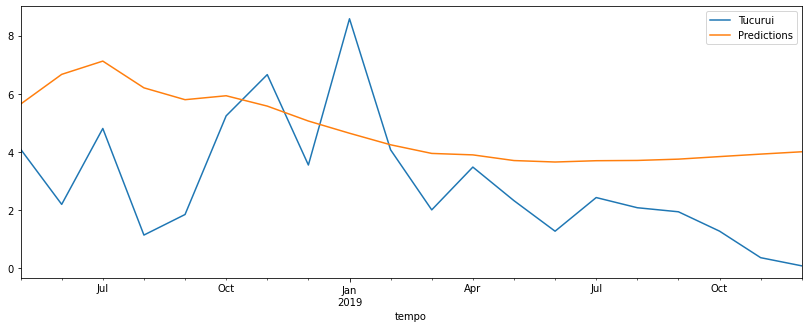

In [62]:
test_tucu.plot(figsize=(14,5))

In [63]:
true_predictions_alt = scaler.inverse_transform(test_predictions_alt)

In [64]:
test_alt['Predictions'] = true_predictions_alt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
test_alt

,Altamira,Predictions
tempo,,
2018-05-01,5.882353,9.443136
2018-06-01,0.591716,9.030872
2018-07-01,4.761905,8.356474
2018-08-01,2.395210,7.307293
2018-09-01,4.216867,7.019801
2018-10-01,4.242424,7.728248
2018-11-01,1.219512,7.651690
2018-12-01,16.564417,5.648867
2019-01-01,5.555556,5.497543


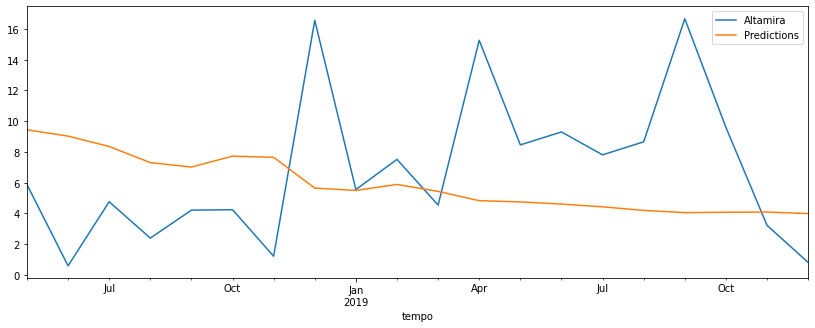

In [66]:
test_alt.plot(figsize=(14,5))

In [70]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_t=sqrt(mean_squared_error(test_tucu['Tucurui'],test_tucu['Predictions']))
rmse_a=sqrt(mean_squared_error(test_alt['Altamira'],test_tucu['Predictions']))
print(rmse_t)
print(rmse_a)

2.670159141131673
5.7538271804246675
